In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

from xgboost import XGBRegressor

All the important dependencies have been imported(classes, modules, etc)

In [2]:
df=pd.read_csv("/kaggle/input/chocolate-sales/Chocolate Sales (2).csv");
print(df.head(6))

     Sales Person    Country              Product        Date      Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04/01/2022   $5,320.00   
1     Van Tuxwell      India        85% Dark Bars  01/08/2022   $7,896.00   
2    Gigi Bohling      India  Peanut Butter Cubes  07/07/2022   $4,501.00   
3    Jan Morforth  Australia  Peanut Butter Cubes  27/04/2022  $12,726.00   
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24/02/2022  $13,685.00   
5     Van Tuxwell      India   Smooth Sliky Salty  06/06/2022   $5,376.00   

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  
5             38  


Dataset is included and a little part of dataset is printed

In [3]:
df['Amount'] = (
    df['Amount']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)


'$' and ',' are removed from amount as model want just the numerical values

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


Correcting the date format

In [5]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Quarter'] = df['Date'].dt.quarter


Data Featuring

In [6]:
categorical_cols = ['Sales Person', 'Country', 'Product']


In [7]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

Encode categorical Columns

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   3282 non-null   int64         
 1   Country        3282 non-null   int64         
 2   Product        3282 non-null   int64         
 3   Date           3282 non-null   datetime64[ns]
 4   Amount         3282 non-null   float64       
 5   Boxes Shipped  3282 non-null   int64         
 6   Year           3282 non-null   int32         
 7   Month          3282 non-null   int32         
 8   Day            3282 non-null   int32         
 9   DayOfWeek      3282 non-null   int32         
 10  Quarter        3282 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(5), int64(4)
memory usage: 218.1 KB


Clean Dataset Check

In [9]:
df = df.sort_values('Date')

X = df.drop(['Amount', 'Date'], axis=1)
y = df['Amount']

split_date = '2025-01-01'

X_train = X[df['Date'] < split_date]
X_test  = X[df['Date'] >= split_date]

y_train = y[df['Date'] < split_date]
y_test  = y[df['Date'] >= split_date]


Splitting data(X and Y)

In [10]:
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

Model training

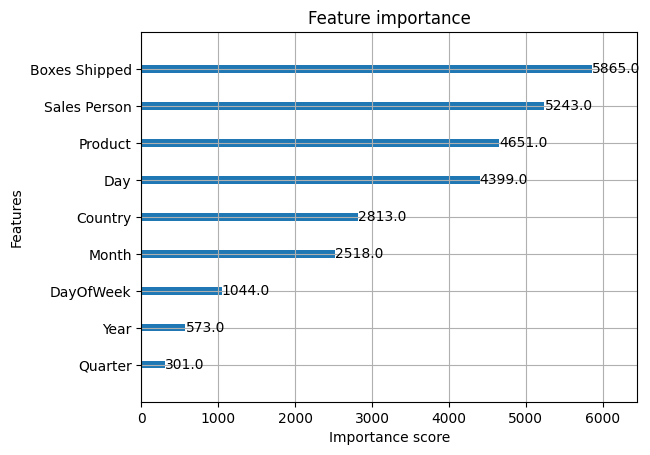

In [11]:
import matplotlib.pyplot as plt
import xgboost as xgb
xgb.plot_importance(model, max_num_features=10)
plt.show()


Feature importance

In [12]:
df['Lag_1'] = df.groupby('Product')['Amount'].shift(1)
df['Lag_3'] = df.groupby('Product')['Amount'].shift(3)

df.fillna(0, inplace=True)


In [13]:
df['Rolling_3'] = df.groupby('Product')['Amount'].rolling(3).mean().reset_index(0, drop=True)


Optional improvement(highly recommended)
